In [1]:
""" Synthetic Minority Oversampling Technique, or SMOTE for short."""

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SVMSMOTE, BorderlineSMOTE, KMeansSMOTE, SMOTENC
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
import seaborn as sns

sns.set_context("poster")

from numpy import where
import imblearn
import matplotlib.pyplot as plt
print(imblearn.__version__)

0.7.0


In [5]:
# define dataset: 2-class unballanced
X, y = make_classification(n_samples=10000, 
                           n_features=3, 
                           n_informative=3,
                           n_redundant=0, 
                           n_classes=3,
                           n_clusters_per_class=1, 
                           weights=[0.50, 0.35], 
                           flip_y=0, 
                           random_state=1)

In [6]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 5000, 1: 3500, 2: 1500})


In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
"""This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled
“SMOTE: Synthetic Minority Over-sampling Technique.”"""

# define pipeline
smote_sampling_strategy = {0: 5000, 1: 5000, 2: 5000}
over = SMOTE(sampling_strategy=smote_sampling_strategy)

under_sampling_strategy = {0: 4000, 1: 4000, 2: 4000}
under = RandomUnderSampler(sampling_strategy=under_sampling_strategy)
pipeline_chain = [('o', over), ('u', under)]
pipeline = Pipeline(steps=pipeline_chain)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print("Ballanced counter for each class: ", counter)

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Ballanced counter for each class:  Counter({0: 5000, 1: 3500, 2: 1500})
Ballanced counter for each class:  Counter({1: 5000, 0: 5000, 2: 5000})
Ballanced counter for each class:  Counter({1: 5000, 0: 5000, 2: 5000})
Ballanced counter for each class:  Counter({1: 5000, 0: 5000, 2: 5000})
Ballanced counter for each class:  Counter({1: 5000, 0: 5000, 2: 5000})
Ballanced counter for each class:  Counter({2: 5036, 1: 5031, 0: 5000})


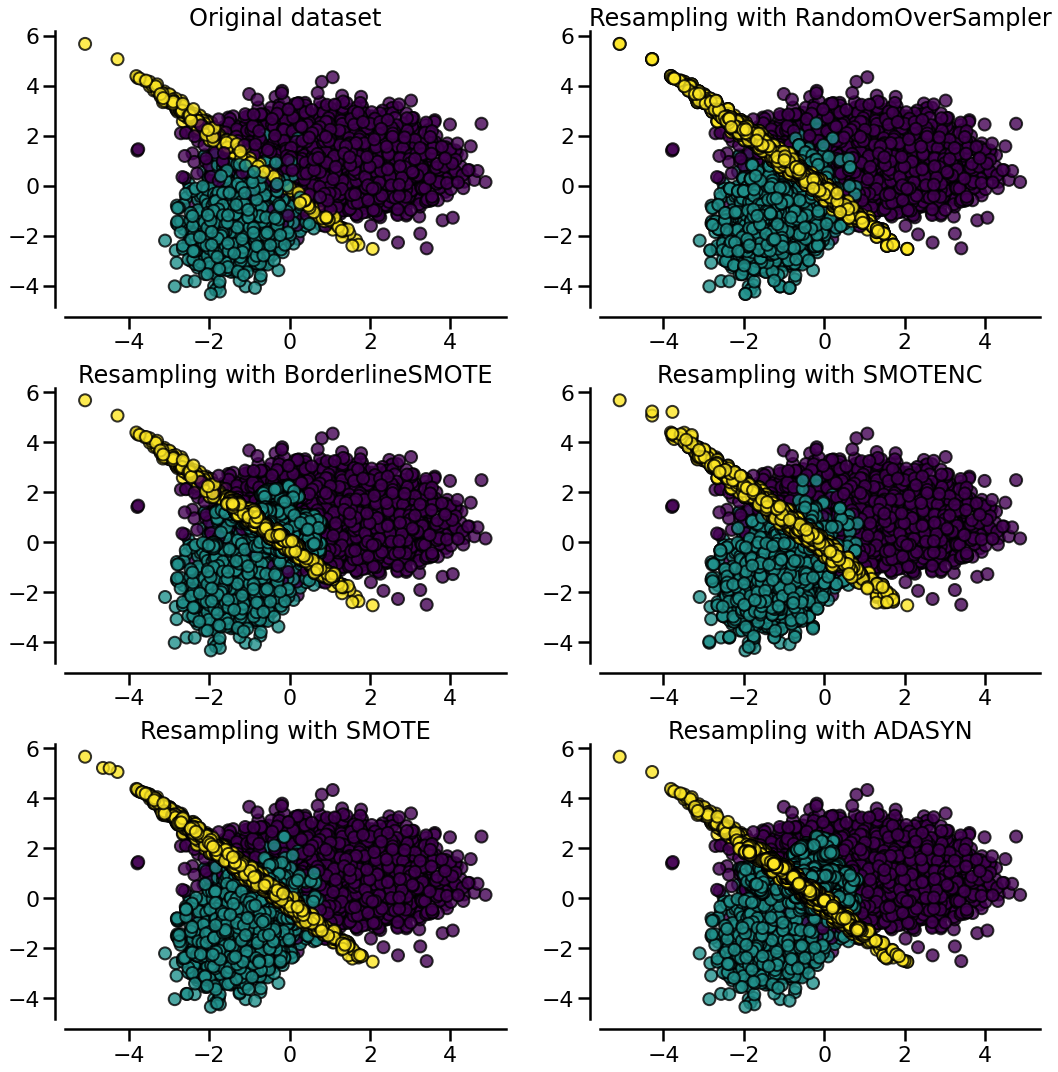

In [7]:
"""When dealing with a mixed of continuous and categorical features, 
SMOTENC is the only method which can handle this case.
Synthetic Minority Over-sampling Technique for Nominal and Continuous.

Unlike SMOTE, SMOTE-NC for dataset containing numerical and categorical features. 
However, it is not designed to work with only categorical features."""

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    BorderlineSMOTE(random_state=0, kind="borderline-1"),
    SMOTENC(categorical_features=[0, 2], random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]
"""The following function will be used to plot the sample space after resampling to illustrate the specificities
of an algorithm."""
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)
    # summarize the new class distribution
    counter = Counter(y_res)
    print("Ballanced counter for each class: ", counter)

for ax, sampler in zip(axs.ravel(), samplers):
    title = "Original dataset" if isinstance(sampler, FunctionSampler) else None
    plot_resampling(X, y, sampler, ax, title=title)
fig.tight_layout()